In [1]:
import censusdata
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy import stats
import gmaps

In [2]:
# Specify path to read file
geo = os.path.join("Resources", "Geo out.csv")
states = os.path.join("Resources", "geocodes.xlsx")

# Read in pandas
geo_df = pd.read_csv(geo)  
states_df = pd.read_excel(states, index_col=None, convert_float=False) 

In [3]:
# Add State and County Codes using substrings in order to join for geo locations later
geo_df["State_County"] = geo_df.County.str.split('(').str[1]
geo_df["State_County"] = geo_df.State_County.str.split(')').str[0]
geo_df["State_ID"] = geo_df.State_County.str.slice(start=0, stop=2).astype(int)
geo_df["County_ID"] = geo_df.State_County.str.slice(start=2, stop=5).astype(int)

In [4]:
# Filter for only County Codes
counties_df = states_df.loc[states_df['SummaryLevel'] == 50]
counties_df

,SummaryLevel,StateCode,CountyCode,CountySubdivisionCode,PlaceCode,ConsolidtatedCityCode,Area Name
2,50,1,1,0,0,0,Autauga County
3,50,1,3,0,0,0,Baldwin County
4,50,1,5,0,0,0,Barbour County
5,50,1,7,0,0,0,Bibb County
6,50,1,9,0,0,0,Blount County
...,...,...,...,...,...,...,...
43905,50,72,145,0,0,0,Vega Baja Municipio
43906,50,72,147,0,0,0,Vieques Municipio
43907,50,72,149,0,0,0,Villalba Municipio
43908,50,72,151,0,0,0,Yabucoa Municipio


In [5]:
geo_states_df = pd.merge(counties_df, geo_df, left_on=["StateCode", "CountyCode"], right_on = ["State_ID","County_ID"], how="inner")
# df_CA = geo_states_df.loc[(geo_states_df['STATE'] == 'CA')]
geo_states_df

,SummaryLevel,StateCode,CountyCode,CountySubdivisionCode,PlaceCode,ConsolidtatedCityCode,Area Name,STATE,AGE_ADJUSTED_RATE,COUNT,POPULATION,County,County Name,lat,lng,Ratings,State_County,State_ID,County_ID
0,50,1,1,0,0,0,Autauga County,AL,178.3,556,275112,Autauga County (01001),Autauga County,32.579182,-86.499655,1.783,01001,1,1
1,50,1,3,0,0,0,Baldwin County,AL,165.3,2331,1017401,Baldwin County (01003),Baldwin County,30.601074,-87.776333,1.653,01003,1,3
2,50,1,5,0,0,0,Barbour County,AL,179.2,301,130973,Barbour County (01005),Barbour County,31.817290,-85.354965,1.792,01005,1,5
3,50,1,7,0,0,0,Bibb County,AL,189.0,251,112750,Bibb County (01007),Bibb County,32.956280,-87.142289,1.890,01007,1,7
4,50,1,9,0,0,0,Blount County,AL,175.3,653,287998,Blount County (01009),Blount County,34.014515,-86.499655,1.753,01009,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,50,56,37,0,0,0,Sweetwater County,WY,138.0,268,222695,Sweetwater County (56037),Sweetwater County,41.851940,-109.188005,1.380,56037,56,37
3080,50,56,39,0,0,0,Teton County,WY,95.0,107,114533,Teton County (56039),Teton County,43.853632,-110.631449,0.950,56039,56,39
3081,50,56,41,0,0,0,Uinta County,WY,146.3,147,103697,Uinta County (56041),Uinta County,41.210740,-110.616892,1.463,56041,56,41
3082,50,56,43,0,0,0,Washakie County,WY,126.1,78,41172,Washakie County (56043),Washakie County,43.834783,-107.703763,1.261,56043,56,43


In [6]:
# Download ACS 2011-2015 5-year estimates for Oakland city, California on population size, median age, and median household income.
data = censusdata.download('acs5', 2017, censusdata.censusgeo([('county', '*')]), ['B01001_001E', 'B01002_001E', 'B19013_001E','B12006_006E','B12006_011E','B17005_006E', "B17005_011E", "C27016_041E", "B19215_005E", "B19215_008E", "B09019_027E", "B09019_030E","B19301_001E","B17001_002E","B28008_010E"])

data_table = data.rename(columns={"B01001_001E": "population size", "B01002_001E": "median age",
                                  "B19013_001E" : "median household income", "B12006_006E" : "NeverMarried Unemployed Male", 
                                  "B12006_011E" : "NeverMarried Unemployed Female", "B17005_006E" : "Unemployed Male below line", 
                                  "B17005_011E" : "Unemployed Female below line", "C27016_041E" : "4.00 of poverty threshold 65 years and over No health insurance coverage",
                                  "B19215_005E" : "MEDIAN HOUSEHOLD INCOME Living Alone 65 and over", "B19215_008E" : "MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over",
                                  "B09019_027E" : "Male Living alone", "B09019_030E" : "Female Living alone",
                                  "B19301_001E": "Per Capita Income","B17001_002E": "Poverty Count",
                                  "B28008_010E" : "Total No Computer"})

In [7]:
data_table.index = data_table.index.astype(str)
data_table["County_State"] = data_table.index.str.split(':').str[0]
data_table["County_Name"] = data_table.County_State.str.split(',').str[0]
data_table["State"] = data_table.County_State.str.split(',').str[1]
data_table["State_County"] = data_table.index.str.split('state:').str[1]
data_table["State_ID"] = data_table.State_County.str.split('>').str[0].astype(int)
data_table["County_ID"] = data_table.State_County.str.split('county:').str[1].astype(int)

data_table.head()

,population size,median age,median household income,NeverMarried Unemployed Male,NeverMarried Unemployed Female,Unemployed Male below line,Unemployed Female below line,4.00 of poverty threshold 65 years and over No health insurance coverage,MEDIAN HOUSEHOLD INCOME Living Alone 65 and over,MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over,...,Female Living alone,Per Capita Income,Poverty Count,Total No Computer,County_State,County_Name,State,State_County,State_ID,County_ID
"Corozal Municipio, Puerto Rico: Summary level: 050, state:72> county:047",34933,38.1,14752,1397,641,1395,1143,0,11100,-666666666,...,1288,7887,19146,12699,"Corozal Municipio, Puerto Rico",Corozal Municipio,Puerto Rico,72> county:047,72,47
"Maunabo Municipio, Puerto Rico: Summary level: 050, state:72> county:095",11297,43.5,17636,309,206,234,303,5,12656,-666666666,...,664,8830,5945,4379,"Maunabo Municipio, Puerto Rico",Maunabo Municipio,Puerto Rico,72> county:095,72,95
"Peñuelas Municipio, Puerto Rico: Summary level: 050, state:72> county:111",21661,36.4,16868,473,394,672,554,48,13382,-666666666,...,753,7983,12379,7055,"Peñuelas Municipio, Puerto Rico",Peñuelas Municipio,Puerto Rico,72> county:111,72,111
"Ponce Municipio, Puerto Rico: Summary level: 050, state:72> county:113",148863,39.5,16561,2731,1668,2839,1934,39,10385,21445,...,8517,10775,75187,46167,"Ponce Municipio, Puerto Rico",Ponce Municipio,Puerto Rico,72> county:113,72,113
"San Sebastián Municipio, Puerto Rico: Summary level: 050, state:72> county:131",38970,42.0,14275,1209,625,1053,1189,0,8508,43718,...,1892,8072,21472,16618,"San Sebastián Municipio, Puerto Rico",San Sebastián Municipio,Puerto Rico,72> county:131,72,131


In [8]:
deathrates_census = pd.merge(geo_states_df, data_table, left_on=["StateCode","CountyCode"], right_on=["State_ID","County_ID"])
deathrates_census

,SummaryLevel,StateCode,CountyCode,CountySubdivisionCode,PlaceCode,ConsolidtatedCityCode,Area Name,STATE,AGE_ADJUSTED_RATE,COUNT,...,Female Living alone,Per Capita Income,Poverty Count,Total No Computer,County_State,County_Name,State,State_County_y,State_ID_y,County_ID_y
0,50,1,1,0,0,0,Autauga County,AL,178.3,556,...,2916,27824,7483,4846,"Autauga County, Alabama",Autauga County,Alabama,01> county:001,1,1
1,50,1,3,0,0,0,Baldwin County,AL,165.3,2331,...,13677,29364,23728,16581,"Baldwin County, Alabama",Baldwin County,Alabama,01> county:003,1,3
2,50,1,5,0,0,0,Barbour County,AL,179.2,301,...,1623,17561,6332,4693,"Barbour County, Alabama",Barbour County,Alabama,01> county:005,1,5
3,50,1,7,0,0,0,Bibb County,AL,189.0,251,...,808,20911,3133,4001,"Bibb County, Alabama",Bibb County,Alabama,01> county:007,1,7
4,50,1,9,0,0,0,Blount County,AL,175.3,653,...,2782,22021,8919,8447,"Blount County, Alabama",Blount County,Alabama,01> county:009,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,50,56,37,0,0,0,Sweetwater County,WY,138.0,268,...,1843,31700,5274,1927,"Sweetwater County, Wyoming",Sweetwater County,Wyoming,56> county:037,56,37
3080,50,56,39,0,0,0,Teton County,WY,95.0,107,...,1356,49200,1561,574,"Teton County, Wyoming",Teton County,Wyoming,56> county:039,56,39
3081,50,56,41,0,0,0,Uinta County,WY,146.3,147,...,912,27115,3048,1049,"Uinta County, Wyoming",Uinta County,Wyoming,56> county:041,56,41
3082,50,56,43,0,0,0,Washakie County,WY,126.1,78,...,539,27345,1039,557,"Washakie County, Wyoming",Washakie County,Wyoming,56> county:043,56,43


In [9]:
# deathrates_census.columns = [c.replace(' ', '') for c in deathrates_census.columns]
deathrates_census["Never Married Percentage"] = (deathrates_census["NeverMarried Unemployed Male"] +deathrates_census["NeverMarried Unemployed Female"]) / deathrates_census["population size"]
deathrates_census["Unemployed Below Line"] = (deathrates_census["Unemployed Male below line"] +deathrates_census["Unemployed Female below line"]) / deathrates_census["population size"]
deathrates_census["No Insurance Over 65 Below Line"] = (deathrates_census["4.00 of poverty threshold 65 years and over No health insurance coverage"] ) / deathrates_census["population size"]
deathrates_census["Living Alone Percentage"] = (deathrates_census["Male Living alone"] +deathrates_census["Female Living alone"]) / deathrates_census["population size"]
deathrates_census["Income"] = (deathrates_census["median household income"] ) / 10000
deathrates_census["Poverty"] = (deathrates_census["Poverty Count"] ) / deathrates_census["population size"]
deathrates_census["No Computer"] = (deathrates_census["Total No Computer"] ) / deathrates_census["population size"]
# deathrates_census.columns

In [10]:
# Export file for out
compression_opts = dict(method='zip',
                        archive_name='Census out.csv')  
deathrates_census.to_csv('out.zip', index=False,
          compression=compression_opts)  

In [11]:
summary_df = deathrates_census[["State","County_Name","AGE_ADJUSTED_RATE", "Ratings","Never Married Percentage", "Unemployed Below Line", "No Insurance Over 65 Below Line","Living Alone Percentage","median age","median household income","Poverty", "No Computer","lat","lng"]] 
summary_df

,State,County_Name,AGE_ADJUSTED_RATE,Ratings,Never Married Percentage,Unemployed Below Line,No Insurance Over 65 Below Line,Living Alone Percentage,median age,median household income,Poverty,No Computer,lat,lng
0,Alabama,Autauga County,178.3,1.783,0.013064,0.007050,0.000000,0.099626,37.8,55317,0.135966,0.088051,32.579182,-86.499655
1,Alabama,Baldwin County,165.3,1.653,0.013218,0.007337,0.000000,0.113926,42.6,52562,0.116680,0.081535,30.601074,-87.776333
2,Alabama,Barbour County,179.2,1.792,0.026411,0.017671,0.000000,0.112057,39.7,33368,0.241670,0.179115,31.817290,-85.354965
3,Alabama,Bibb County,189.0,1.890,0.015988,0.006953,0.000000,0.065633,39.8,43404,0.138751,0.177192,32.956280,-87.142289
4,Alabama,Blount County,175.3,1.753,0.006104,0.005098,0.000000,0.086184,40.9,47412,0.154664,0.146479,34.014515,-86.499655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,Wyoming,Sweetwater County,138.0,1.380,0.011139,0.008849,0.000292,0.094302,34.0,71083,0.118445,0.043277,41.851940,-109.188005
3080,Wyoming,Teton County,95.0,0.950,0.005060,0.000000,0.000785,0.109715,39.0,80049,0.068098,0.025040,43.853632,-110.631449
3081,Wyoming,Uinta County,146.3,1.463,0.017873,0.008238,0.000000,0.088448,35.1,54672,0.146835,0.050535,41.210740,-110.616892
3082,Wyoming,Washakie County,126.1,1.261,0.004604,0.012601,0.000848,0.111232,43.4,51362,0.125894,0.067491,43.834783,-107.703763


y = -206.24x +84980.22
-0.4471349925351067


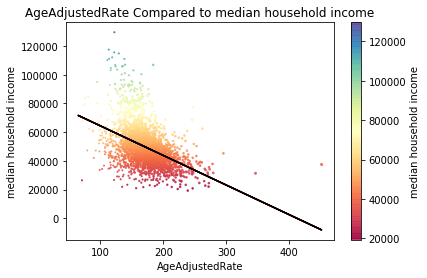

<Figure size 432x288 with 0 Axes>

In [27]:
# Compare Deaths to median age
x_axis = summary_df.loc[:,"AGE_ADJUSTED_RATE"]
y_axis = summary_df.loc[:,'median household income']
s = summary_df.loc[:,'Ratings']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print Pearson's correlation coefficient (rvalue)
print(rvalue)

# Create Plot
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'Spectral', s=s, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")

plt.title('AgeAdjustedRate Compared to median household income')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('median household income')
plt.plot(x_axis,regress_values,"k-")
cbar = plt.colorbar()
cbar.set_label('median household income')
plt.show()
plt.savefig("test.png")

y = 0.0x +-0.0
0.3603220423348933


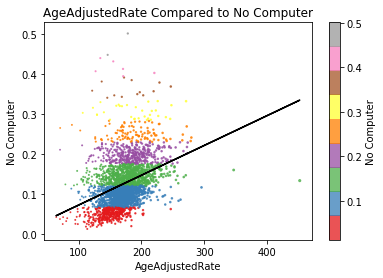

The correlation between rate and No Computer is 0.36


In [13]:
# Compare Deaths to median household income
x_axis = summary_df.loc[:,"AGE_ADJUSTED_RATE"]
y_axis = summary_df.loc[:,'No Computer']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print Pearson's correlation coefficient (rvalue)
print(rvalue)

s = summary_df.loc[:,'Ratings']
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'Set1', s=s, alpha=0.75)
plt.title('AgeAdjustedRate Compared to No Computer')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('No Computer')
plt.plot(x_axis,regress_values,"k-")
cbar = plt.colorbar()
cbar.set_label('No Computer')
plt.show()

rate = summary_df.iloc[:,2]
factor = summary_df.iloc[:,11]
correlation = sts.pearsonr(rate,factor)
print(f"The correlation between rate and No Computer is {round(correlation[0],2)}")

y = 0.0x +0.01
0.4031878482268183


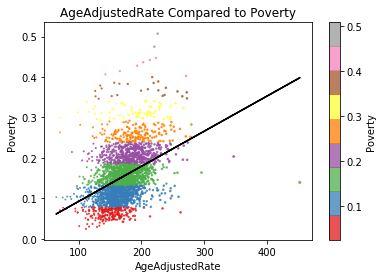

In [14]:
# Compare Deaths to median household income
x_axis = summary_df.loc[:,"AGE_ADJUSTED_RATE"]
y_axis = summary_df.loc[:,'Poverty']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print Pearson's correlation coefficient (rvalue)
print(rvalue)

s = summary_df.loc[:,'Ratings']
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'Set1', s=s, alpha=0.75)
plt.title('AgeAdjustedRate Compared to Poverty')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('Poverty')
plt.plot(x_axis,regress_values,"k-")
cbar = plt.colorbar()
cbar.set_label('Poverty')
plt.show()

y = 0.0x +0.1
0.06849552123917456


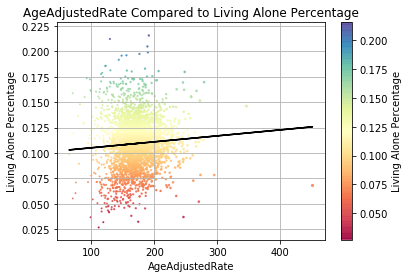

The correlation between rate and Living Alone is 0.07


In [15]:
# Compare Deaths to Living Alone Percentage
x_axis = summary_df.loc[:,"AGE_ADJUSTED_RATE"]
y_axis = summary_df.loc[:,'Living Alone Percentage']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print Pearson's correlation coefficient (rvalue)
print(rvalue)

s = deathrates_census.loc[:,'Ratings']
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'Spectral', s=s, alpha=0.75)
plt.title('AgeAdjustedRate Compared to Living Alone Percentage')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('Living Alone Percentage')
plt.grid(True)
plt.plot(x_axis,regress_values,"k-")
cbar = plt.colorbar()
cbar.set_label('Living Alone Percentage')
plt.show()

rate = summary_df.iloc[:,2]
factor = summary_df.iloc[:,7]
correlation = sts.pearsonr(rate,factor)
print(f"The correlation between rate and Living Alone is {round(correlation[0],2)}")

y = 0.0x +-0.0
0.3390666510892387


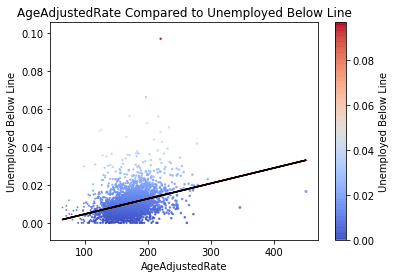

In [16]:
# Compare Deaths to unemployement
x_axis = summary_df.loc[:,"AGE_ADJUSTED_RATE"]
y_axis = summary_df.loc[:,'Unemployed Below Line']
s = deathrates_census.loc[:,'Ratings']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print Pearson's correlation coefficient (rvalue)
print(rvalue)

# Create Plot for Deaths to unemployement
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'coolwarm', s=s, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")

plt.title('AgeAdjustedRate Compared to Unemployed Below Line')
plt.xlabel('AgeAdjustedRate')
plt.ylabel('Unemployed Below Line')
plt.plot(x_axis,regress_values,"k-")
cbar = plt.colorbar()
cbar.set_label('Unemployed Below Line')
plt.show()

In [17]:
# Store latitude and longitude in locations
locations = summary_df[["lat", "lng"]]

# Fill NaN values and convert to float
rating = summary_df["Ratings"].astype(float)

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=20,
                                 point_radius=1)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [18]:
# Store latitude and longitude in locations
locations = summary_df[["lat", "lng"]]

# Fill NaN values and convert to float
rating = summary_df["Living Alone Percentage"].astype(float)

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=0,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
# Store latitude and longitude in locations
locations = summary_df[["lat", "lng"]]

# Fill NaN values and convert to float
rating = summary_df["Poverty"].astype(float)

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=0,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
# Set pearsonr correlation

rate = summary_df.iloc[:,2]
factor = summary_df.iloc[:,5]
correlation = sts.pearsonr(rate,factor)
print(f"The correlation between rate and unemployed factors is {round(correlation[0],2)}")

rate = summary_df.iloc[:,2]
factor = summary_df.iloc[:,4]
correlation = sts.pearsonr(rate,factor)
print(f"The correlation between rate and Never Married factors is {round(correlation[0],2)}")

rate = summary_df.iloc[:,2]
factor = summary_df.iloc[:,6]
correlation = sts.pearsonr(rate,factor)
print(f"The correlation between rate and no insurance is {round(correlation[0],2)}")

rate = summary_df.iloc[:,2]
factor = summary_df.iloc[:,7]
correlation = sts.pearsonr(rate,factor)
print(f"The correlation between rate and living alone is {round(correlation[0],2)}")

rate = summary_df.iloc[:,2]
factor = summary_df.iloc[:,8]
correlation = sts.pearsonr(rate,factor)
print(f"The correlation between rate and age is {round(correlation[0],2)}")

rate = summary_df.iloc[:,2]
factor = summary_df.iloc[:,9]
correlation = sts.pearsonr(rate,factor)
print(f"The correlation between rate and income is {round(correlation[0],2)}")

rate = summary_df.iloc[:,2]
factor = summary_df.iloc[:,10]
correlation = sts.pearsonr(rate,factor)
print(f"The correlation between rate and poverty is {round(correlation[0],2)}")

rate = summary_df.iloc[:,2]
factor = summary_df.iloc[:,11]
correlation = sts.pearsonr(rate,factor)
print(f"The correlation between rate and no computer is {round(correlation[0],2)}")

The correlation between rate and unemployed factors is 0.34
The correlation between rate and Never Married factors is 0.2
The correlation between rate and no insurance is -0.07
The correlation between rate and living alone is 0.07
The correlation between rate and age is 0.01
The correlation between rate and income is -0.45
The correlation between rate and poverty is 0.4
The correlation between rate and no computer is 0.36


In [24]:
corr=summary_df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=0)

,AGE_ADJUSTED_RATE,Ratings,Never Married Percentage,Unemployed Below Line,No Insurance Over 65 Below Line,Living Alone Percentage,median age,median household income,Poverty,No Computer,lat,lng
AGE_ADJUSTED_RATE,1.000000,1.000000,0.201565,0.339067,-0.070931,0.068496,0.005677,-0.447135,0.403188,0.360322,-0.164409,0.248803
Ratings,1.000000,1.000000,0.201565,0.339067,-0.070931,0.068496,0.005677,-0.447135,0.403188,0.360322,-0.164409,0.248803
Never Married Percentage,0.201565,0.201565,1.000000,0.781524,0.044532,-0.075851,-0.288331,-0.249101,0.525378,0.216465,-0.167905,0.098870
Unemployed Below Line,0.339067,0.339067,0.781524,1.000000,0.031159,0.001508,-0.169771,-0.472249,0.705246,0.393381,-0.224219,0.090296
No Insurance Over 65 Below Line,-0.070931,-0.070931,0.044532,0.031159,1.000000,-0.132406,-0.127519,0.066529,0.039880,0.049906,-0.058088,-0.083154
Living Alone Percentage,0.068496,0.068496,-0.075851,0.001508,-0.132406,1.000000,0.509363,-0.319346,0.055752,0.171680,0.217196,0.045618
median age,0.005677,0.005677,-0.288331,-0.169771,-0.127519,0.509363,1.000000,-0.121358,-0.201766,0.156865,0.145047,0.094214
median household income,-0.447135,-0.447135,-0.249101,-0.472249,0.066529,-0.319346,-0.121358,1.000000,-0.749535,-0.701351,0.289084,-0.068860
Poverty,0.403188,0.403188,0.525378,0.705246,0.039880,0.055752,-0.201766,-0.749535,1.000000,0.665142,-0.363620,0.067420
No Computer,0.360322,0.360322,0.216465,0.393381,0.049906,0.171680,0.156865,-0.701351,0.665142,1.000000,-0.289066,0.132413


In [22]:
plt.savefig("test.png")

<Figure size 432x288 with 0 Axes>